<a href="https://colab.research.google.com/github/Takaros96/Logistic-Regression-US-Household-Income-Classification/blob/main/Coursera_guided_projects_Logistic_Regression101_US_Income_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#logistic regression is a statitical model that is used to predict binary outputs


In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
import xgboost

In [ ]:
columns=['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
         'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss','Hours/Week',
         'Native country','Income']

In [ ]:
df=pd.read_csv('/content/data (1).csv',names=columns)#the columns of the df will have the name specified above

In [ ]:
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32561, dtype: object

In [ ]:
df['Income']=df['Income'].apply(lambda x:1 if x==' >50K' else 0)

In [ ]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [ ]:
df.Workclass.mode()#mode is the value that appears most often

0     Private
Name: Workclass, dtype: object

In [ ]:
df.Workclass.replace(' ?',df.Workclass.mode()[0],inplace=True)#replace the ? with the most often appeared value in Workclass

In [ ]:
df.Workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [ ]:
df.Occupation.replace(' ?',df.Occupation.mode()[0],inplace=True)

In [ ]:
df.Occupation.value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [ ]:
df['Native country'].replace(' ?',' other',inplace=True)

In [ ]:
df['Native country'].value_counts()

<ipython-input-99-a88ec5d9599a>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

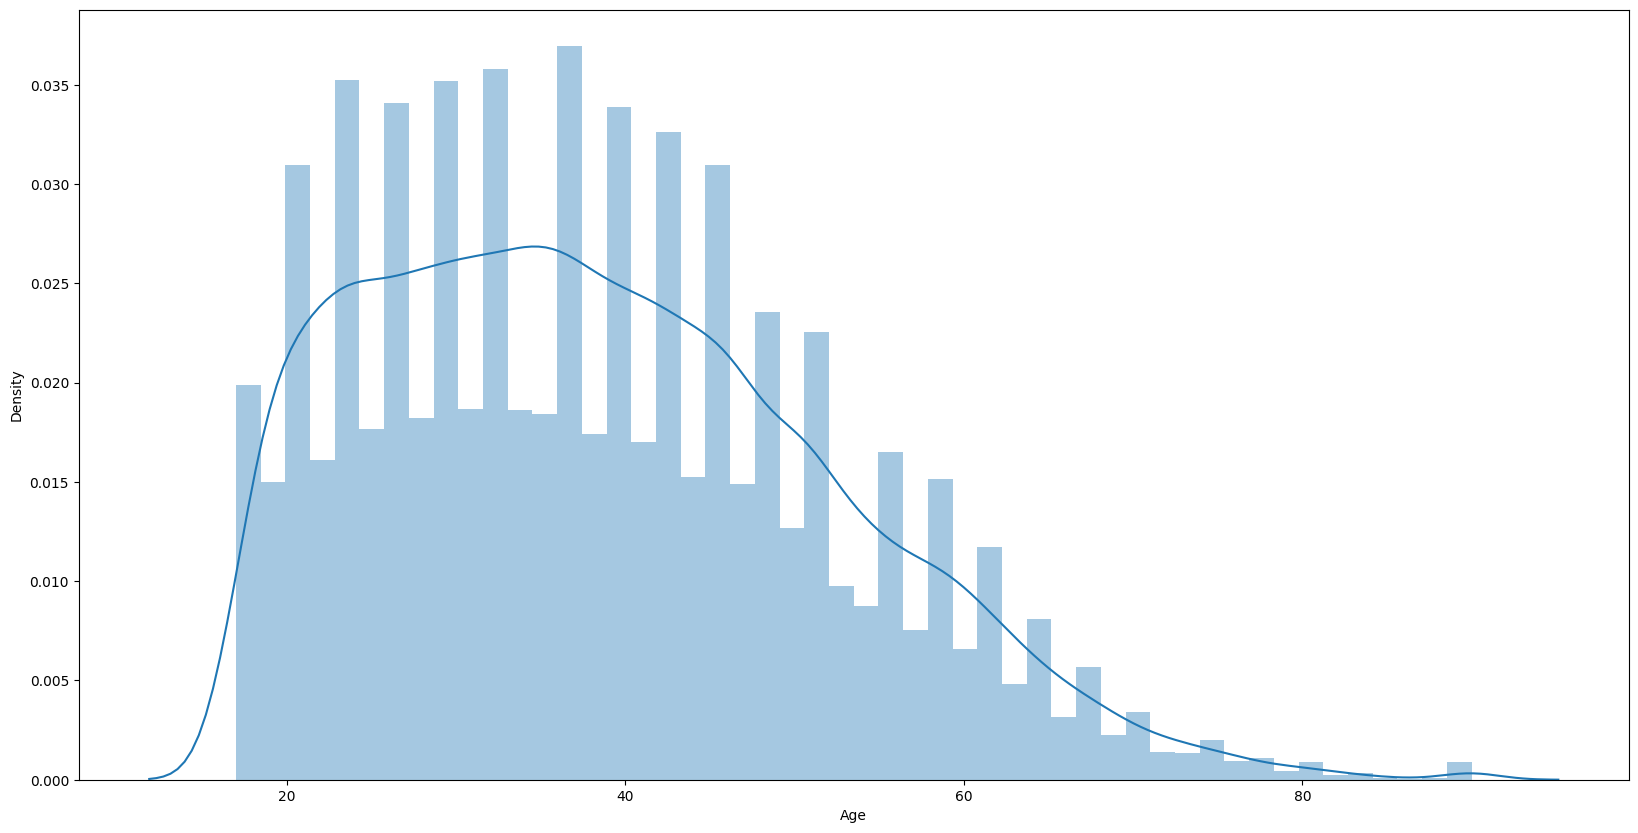

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['Age'])

In [ ]:
#pairplot is a scatterplot of every feature vs the other feature

In [ ]:
df.corr()

In [ ]:
X=df.drop(columns=['Income'])

In [ ]:
y=df['Income']

In [ ]:
encode=LabelEncoder()
for i in X.columns:
  X[i]=encode.fit_transform(X[i])#we transform the values of different features into classes

In [ ]:
features=['Workclass','Education','Marital Status',
         'Occupation','Relationship','Race','Sex',
         'Native country']

In [ ]:
X=pd.get_dummies(X,columns=features)#perform one hot encoding
X.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Workclass_0,Workclass_1,Workclass_2,Workclass_3,...,Native country_32,Native country_33,Native country_34,Native country_35,Native country_36,Native country_37,Native country_38,Native country_39,Native country_40,Native country_41
0,22,2671,12,25,0,39,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,33,2926,12,0,0,12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21,14086,8,0,0,39,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,36,15336,6,0,0,39,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,11,19355,12,0,0,39,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape

((26048, 106), (6513, 106))

In [ ]:
#Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.
#logistic regression algorithm works by implementing a linear equation first
#with independent predictors to predict a value.We then need to convert this value into
#a probability that could range from 0 to 1
#then we convert from a probability to a class value which is 0 or 1

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predicted=lr.predict(X_test)
print(f"Test Accuracy:{accuracy_score(y_test,predicted)}")

Test Accuracy:0.8504529402732995


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4960
           1       0.72      0.60      0.66      1553

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



<Axes: >

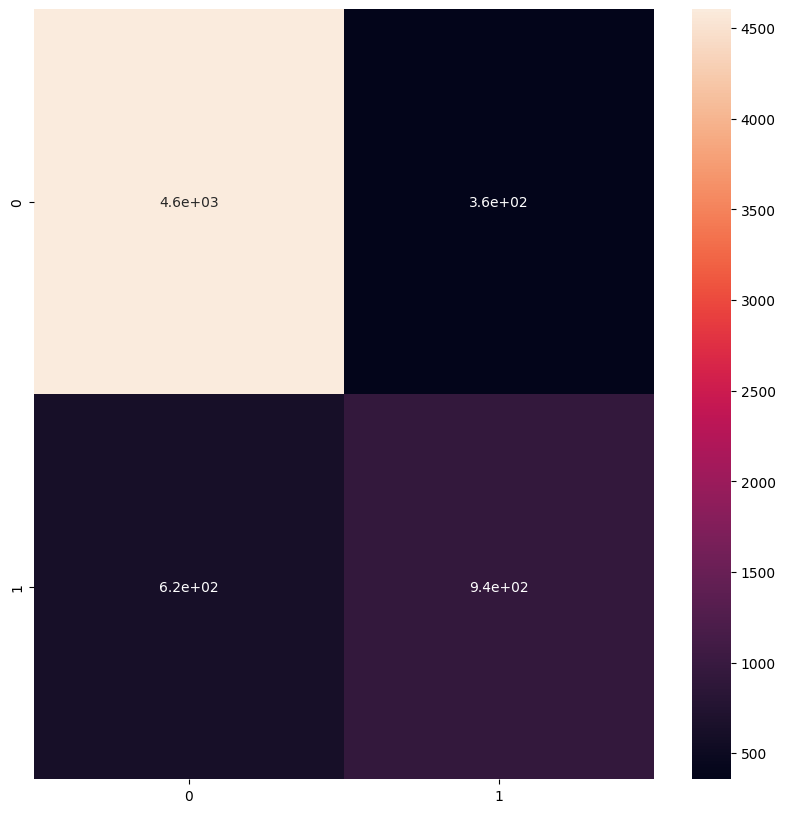

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)#upper left is the truth

In [ ]:
#extreme gradient boosting.it's a supervised learning algorithm
#and implements gradient boosted trees algorithm
#boosting can reduce variance and overfitting and boost robustness
#

In [ ]:
xgb=xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predicted=xgb.predict(X_test)

In [ ]:
predicted

array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
print(f"Accuracy:{accuracy_score(y_test,predicted)}")

Accuracy:0.8673422385997236


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      4960
           1       0.75      0.66      0.70      1553

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.86      0.87      0.86      6513



In [ ]:
xgb=xgboost.XGBClassifier(learning_rate=0.15)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
predicted=xgb.predict(X_test)

In [ ]:
print(f"Accuracy:{accuracy_score(y_test,predicted)}")

Accuracy:0.8721019499462613


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4960
           1       0.77      0.66      0.71      1553

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

